In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


from matplotlib import rcParams

# 1. DATA

Data source: 
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

The data used in this analysis is provided by Kagle for non-commercial purposes only, including for participating in the Competition and on Kaggle.com forums, and for academic research and education. The Competition Data will contain private and public test sets. Which data belongs to which set are not made available to participants.

The competition goal is to predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers.

## 1.1 Data Field Information: Sales Dataset

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

- "store_nbr" identifies the store at which the products are sold.
- "family" identifies the type of product sold.
- "sales" gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- "onpromotion" gives the total number of items in a product family that were being promoted at a store at a given date

## 1.2 Data Field Information: Oil Price Dataset

Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

# 2. EDA

In this task, we are introduced to the project and learning outcomes.

Once we are familiarized with the Rhyme interface, we begin working in Jupyter Notebooks, a web-based interactive computational environment for creating notebook documents.

Next, we will import essential libraries such as NumPy, Pandas, Seaborn, Matplotlib and so on.

We use Pandas to read in the data, get a brief glimpse of the first few rows, and calculate some quick summary statistics of the numeric columns.

In [96]:
retail = pd.read_csv("../Desktop/Análise de dados/PORTFOLIO/4. SALES/train.csv")
oil = pd.read_csv("../Desktop/Análise de dados/PORTFOLIO/4. SALES/oil.csv")

In [97]:
retail['date'] = pd.to_datetime(retail['date'])

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
sales.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

## 2.1 Duplicate Rows and Missing Values

Duplicates



In [106]:
retail.duplicated().sum()

0

In [100]:
retail.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [107]:
oil.duplicated().sum()

0

In [101]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

## 2.2 Overview
In this task, we conduct univariate analysis on both continuous and categorical variables.

We first plot the distribution of customer ratings with seaborn and also overlay the mean, 25th and 75th percentile quantiles calculated using Numpy.

We then use Pandas' .hist() method to plot the distribution for all numeric variables.

Using Seaborn's .countplot() method, we see the frequency distribution of 'Branch' and 'Payment' which are categorical variables.

In [102]:
round(retail[['sales','onpromotion']].describe(),2)

,sales,onpromotion
count,3000888.00,3000888.00
mean,357.78,2.60
std,1102.00,12.22
min,0.00,0.00
25%,0.00,0.00
50%,11.00,0.00
75%,195.85,0.00
max,124717.00,741.00


### 2.2.1 Families

In [5]:
family_sales = retail \
    .groupby('family', as_index=False) \
    .sum() \
    .sort_values('sales', ascending=False)[['family','sales']]

family_sales['cum_perc'] = round((family_sales['sales'].cumsum()/family_sales['sales'].sum())*100,2)

<ipython-input-6-5b3cbf022d7a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(family_sales['family'], rotation = 90)


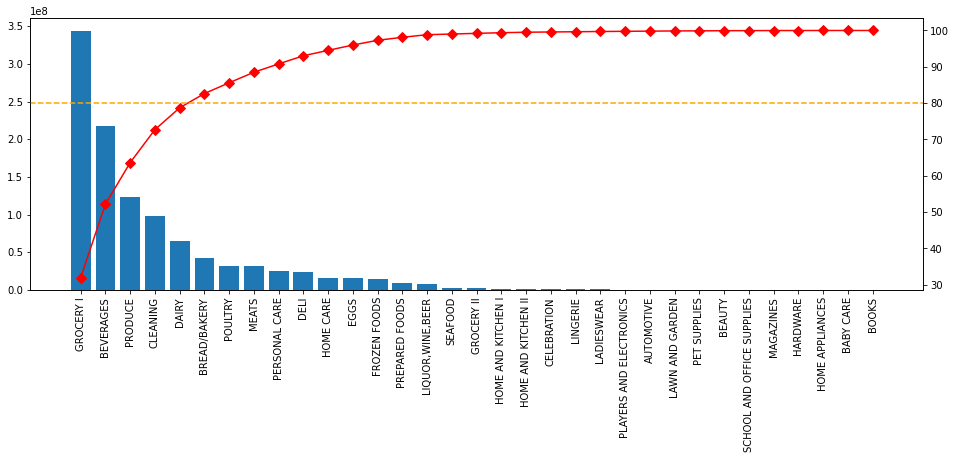

In [6]:
fig, ax = plt.subplots(figsize=(16,5))

ax.bar(family_sales['family'], family_sales["sales"])

ax2 = ax.twinx()
ax2.plot(family_sales['family'], family_sales["cum_perc"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")

ax.set_xticklabels(family_sales['family'], rotation = 90)

plt.show()

In [7]:
chosen_families = ['GROCERY I',
                   'BEVERAGES',
                   'PRODUCE',
                   'CLEANING',
                   'DAIRY']

In [8]:
daily_sales = retail.groupby(['date','family'], as_index=False).sum()[['date','family','sales']]

daily_sales

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,2.000000
3,2013-01-01,BEVERAGES,810.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,17586.709986
55568,2017-08-15,PREPARED FOODS,4641.522980
55569,2017-08-15,PRODUCE,125108.971000
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000


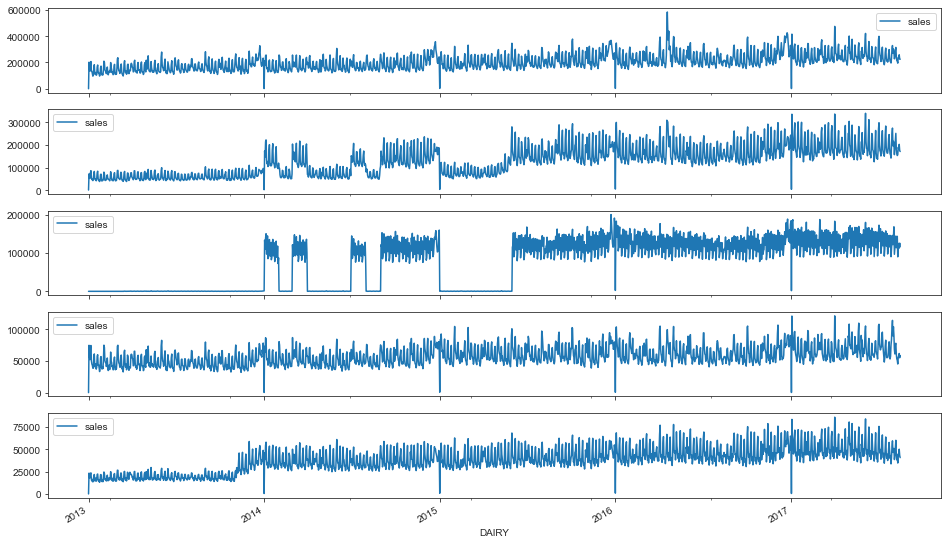

In [146]:
##### SALES OVER CHOSEN FAMILIES

#plt.rcParams.update({'figure.max_open_warning': 0})
fig, ax = plt.subplots(5, 1, figsize=(16, 10), sharex='col')


for i, ax in zip(chosen_families,ax):
    
    daily_sales[daily_sales["family"] == i].plot(ax=ax, x='date', y='sales')
    plt.xlabel(i)

plt.show()

### 2.2.2 Stores

In [59]:
stores_sales = retail \
    .groupby('store_nbr', as_index=False) \
    .sum() \
    .sort_values('sales', ascending=False)[['store_nbr','sales']] \
    .reset_index(drop=True)

stores_sales['cum_perc'] = round((stores_sales['sales'].cumsum()/stores_sales['sales'].sum())*100,2)

#stores_sales.astype({'store_nbr': 'str'})
stores_sales.head()

,store_nbr,sales,cum_perc
0,44,6.208755e+07,5.78
1,45,5.449801e+07,10.86
2,47,5.094831e+07,15.60
3,3,5.048191e+07,20.31
4,49,4.342010e+07,24.35


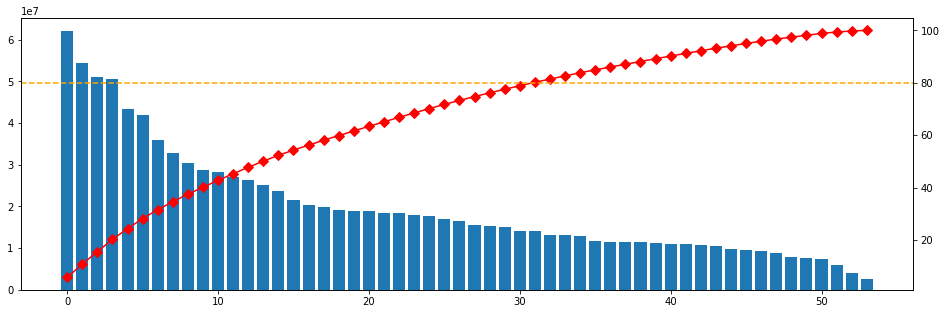

In [60]:
fig, ax = plt.subplots(figsize=(16,5))

ax.bar(stores_sales.index, stores_sales["sales"])

ax2 = ax.twinx()
ax2.plot(stores_sales.index, stores_sales["cum_perc"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")

plt.show()

### 2.3 OUTLIERS

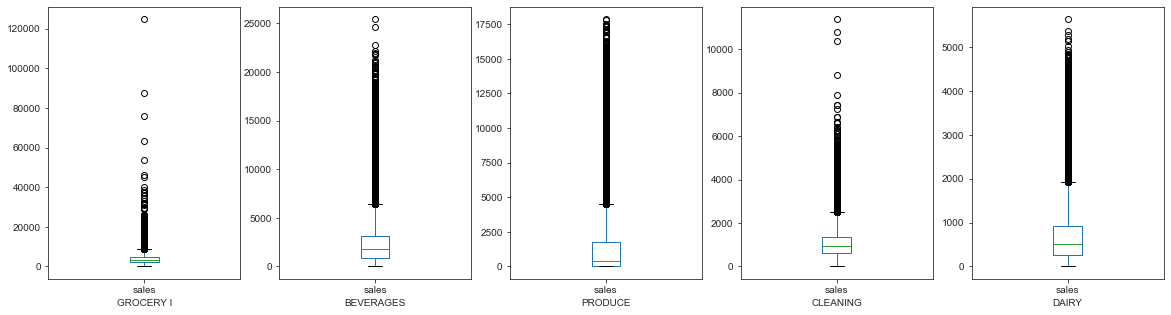

In [153]:
fig, ax = plt.subplots(1, 5, figsize=(20,5))

for i, ax in zip(chosen_families, ax):
    
    retail[retail["family"] == i].plot(ax=ax, y='sales', kind='box')
    ax.set_xlabel(i)

plt.show()

## 3. CORRELATIONS ANALYSIS

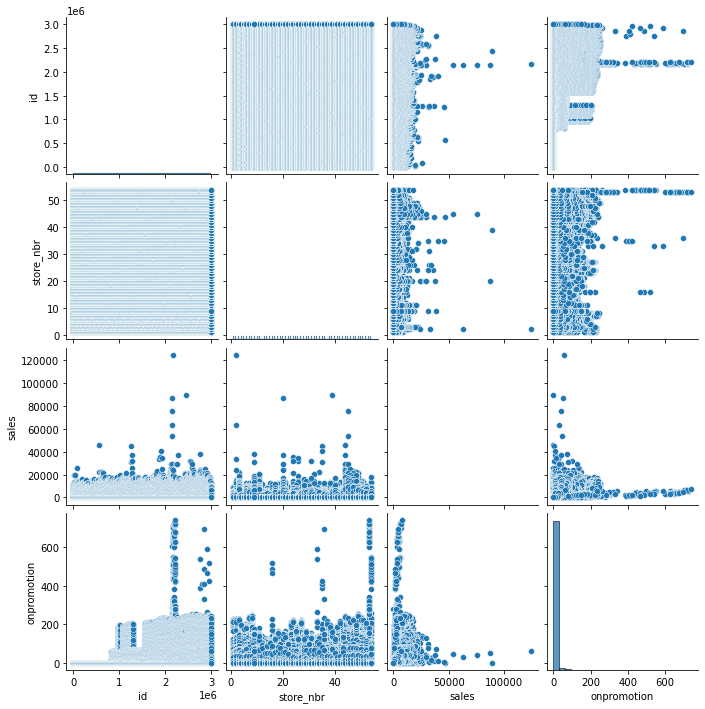

In [64]:
#### ANY RELATIONS

sns.pairplot(sales)

C:\Users\neto_\.conda\envs\analise\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='onpromotion'>

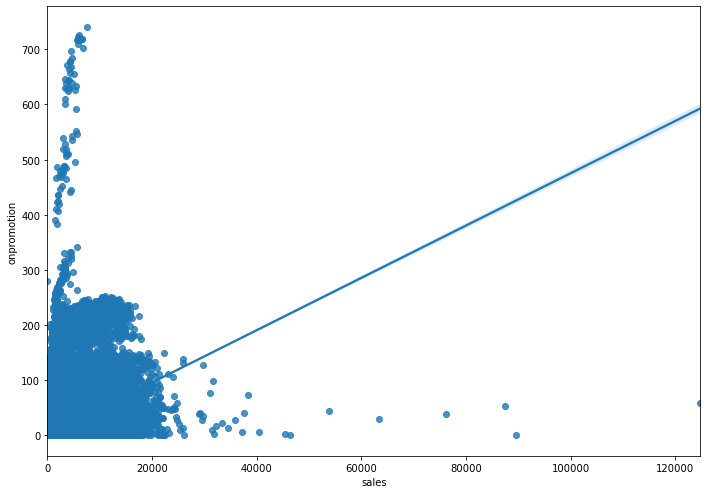

In [31]:
### ARE THERE ANY RELATIONS BETWEEN SALES AND PROMOTION?

sns.regplot(sales['sales'],sales['onpromotion'])

In [11]:
np.corrcoef(sales['sales'],sales['onpromotion'])

array([[1.       , 0.4279232],
       [0.4279232, 1.       ]])

In [64]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [63]:
oil['date'] = pd.to_datetime(oil['date'])

In [66]:
sales_c = retail.groupby('date', as_index = False).sum()[['date','sales']]

In [67]:
sales_oil = pd.merge(sales_c, oil, how='left', on='date')

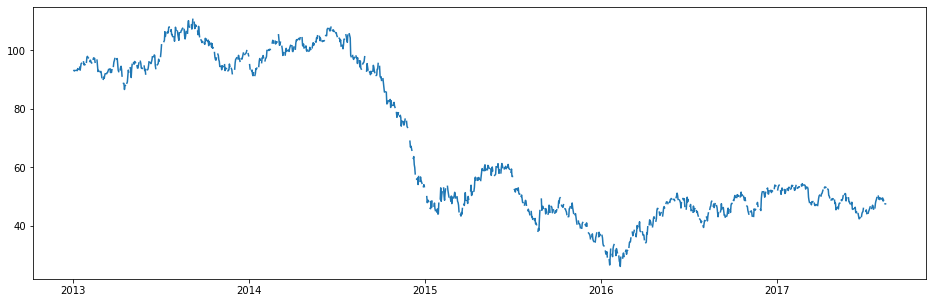

In [76]:
figure(figsize=(16, 5))

plt.plot(sales_oil['date'], sales_oil['dcoilwtico'])

plt.show()

In [77]:
sales_oil.fillna(method='bfill', inplace = True)

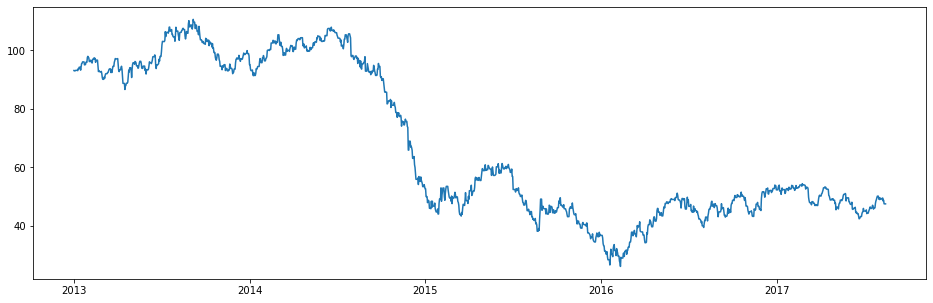

In [78]:
from matplotlib.pyplot import figure

figure(figsize=(16, 5))

plt.plot(sales_oil['date'], sales_oil['dcoilwtico'])

plt.show()

In [80]:
sales_oil.head()

,date,sales,dcoilwtico
0,2013-01-01,2511.618999,93.14
1,2013-01-02,496092.417944,93.14
2,2013-01-03,361461.231124,92.97
3,2013-01-04,354459.677093,93.12
4,2013-01-05,477350.121229,93.20


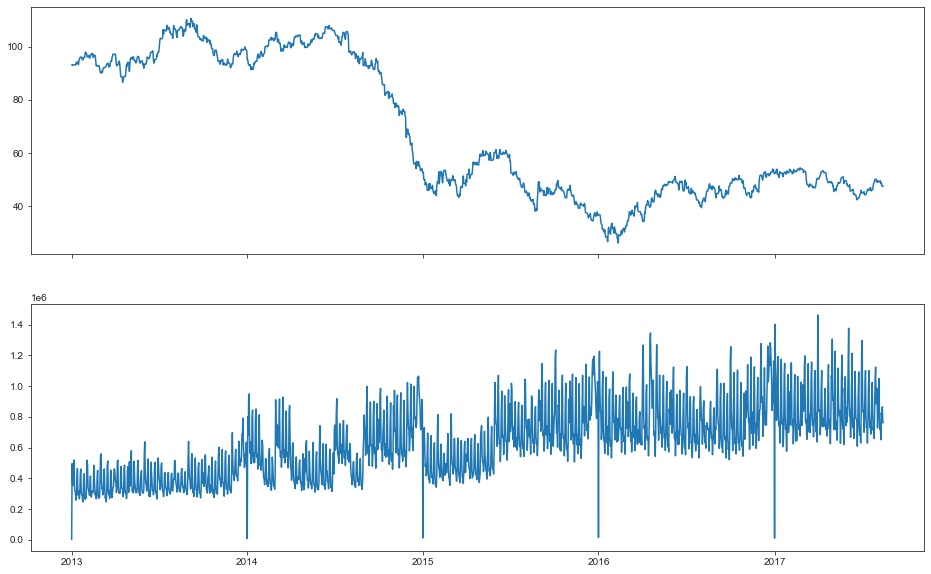

In [85]:
#### COMPARING TIME SERIES

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex='col')

ax1.plot(sales_oil['date'], sales_oil['dcoilwtico'])

ax2.plot(sales_oil['date'], sales_oil['sales'])

plt.show()

C:\Users\neto_\.conda\envs\analise\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


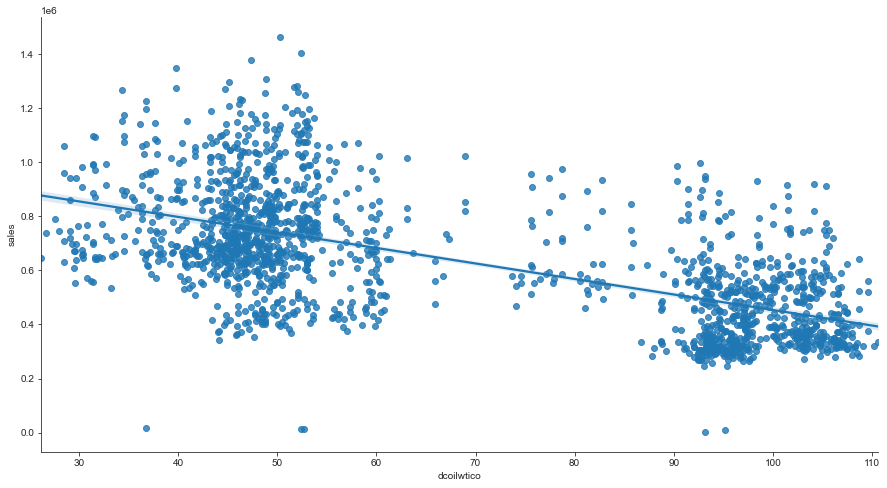

In [79]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.regplot(sales_oil['dcoilwtico'],sales_oil['sales'])

sns.despine()

In [86]:
##### CORRELATIONS

round(np.corrcoef(sales_oil['dcoilwtico'],sales_oil['sales'])[0][1],2)

-0.63

<AxesSubplot:>

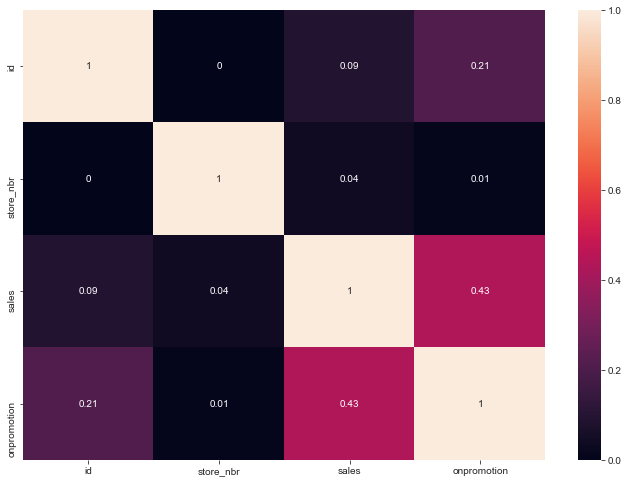

In [90]:
sns.heatmap(round(sales.corr(),2), annot=True)

In [92]:
#### CORRELATION BY FAMILY

for i in chosen_families:
    
    sales_family = retail[retail['family']==i].groupby('date', as_index = False).sum()[['date','sales']]
    sales_oil = pd.merge(sales_family, oil, how='left', on='date')
    sales_oil.fillna(method='bfill', inplace = True)
    
    print(round(np.corrcoef(sales_oil['dcoilwtico'],sales_oil['sales'])[0][1],2))
    print(i)

-0.49
GROCERY I
-0.63
BEVERAGES
-0.65
PRODUCE
-0.42
CLEANING
-0.58
DAIRY


## 4. PREDICTABILITY

SINCE WE'VE FOUND CORRELATIONS, HOW TO FIND THE FUNCTIONS THAT BEST DESCRIBE THIS RELATIONS?

### Average Demand Interval (ADI):
It measures the demand regularity in time by computing the average interval between two demands.
    
### square of the Coefficient of Variation (CV²)
It measures the variation in quantities.

Based on these 2 dimensions, the literature classifies the demand profiles into 4 different categories:

#### Smooth demand (ADI < 1.32 and CV² < 0.49):

The demand is very regular in time and in quantity. It is therefore easy to forecast and you won’t have trouble reaching a low forecasting error level. 


#### Intermittent demand (ADI >= 1.32 and CV² < 0.49):

The demand history shows very little variation in demand quantity but a high variation in the interval between two demands. Though specific forecasting methods tackle intermittent demands, the forecast error margin is considerably higher.


#### Erratic demand (ADI < 1.32 and CV² >= 0.49):

The demand has regular occurrences in time with high quantity variations. Your forecast accuracy remains shaky.


#### Lumpy demand (ADI >= 1.32 and CV² >= 0.49):

The demand is characterized by a large variation in quantity and in time. It is actually impossible to produce a reliable forecast, no matter which forecasting tools you use. This particular type of demand pattern is unforecastable.

In [155]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


### CALCULATING ADI

In [160]:
retail['id_store_family'] = retail['store_nbr'].astype(str)+" - "+retail['family']

retail.head()

,id,date,store_nbr,family,sales,onpromotion,id_store_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1 - AUTOMOTIVE
1,1,2013-01-01,1,BABY CARE,0.0,0,1 - BABY CARE
2,2,2013-01-01,1,BEAUTY,0.0,0,1 - BEAUTY
3,3,2013-01-01,1,BEVERAGES,0.0,0,1 - BEVERAGES
4,4,2013-01-01,1,BOOKS,0.0,0,1 - BOOKS


In [197]:
ADI_tp = retail \
    .groupby('id_store_family', as_index=False).agg(total_periods=pd.NamedAgg(column='sales',aggfunc='count'))

In [198]:
ADI_db = retail[retail['sales']!=0].groupby('id_store_family', as_index=False)\
    .agg(demand_buckets=pd.NamedAgg(column='sales',aggfunc='count'))

In [207]:
ADI = pd.merge(ADI_tp, ADI_db, how='left', on='id_store_family').fillna(0)

ADI['ADI'] = round(ADI['total_periods']/ADI['demand_buckets'],2)

In [208]:
ADI

,id_store_family,total_periods,demand_buckets,ADI
0,1 - AUTOMOTIVE,1684,1463.0,1.15
1,1 - BABY CARE,1684,0.0,inf
2,1 - BEAUTY,1684,1430.0,1.18
3,1 - BEVERAGES,1684,1678.0,1.00
4,1 - BOOKS,1684,127.0,13.26
...,...,...,...,...
1777,9 - POULTRY,1684,1679.0,1.00
1778,9 - PREPARED FOODS,1684,1679.0,1.00
1779,9 - PRODUCE,1684,1016.0,1.66
1780,9 - SCHOOL AND OFFICE SUPPLIES,1684,901.0,1.87


In [204]:
retail['store_nbr'].nunique()*retail['family'].nunique()

1782

### CALCULATING CV2

In [213]:
CV2 = retail.groupby('id_store_family', as_index=False) \
    .agg(std_dev = pd.NamedAgg(column='sales', aggfunc='std'), \
        avg = pd.NamedAgg(column='sales', aggfunc='mean'))

CV2['CV2'] = CV2['std_dev']/CV2['avg']

In [214]:
CV2

,id_store_family,std_dev,avg,CV2
0,1 - AUTOMOTIVE,2.759605,3.251188,0.848799
1,1 - BABY CARE,0.000000,0.000000,NaN
2,1 - BEAUTY,1.898950,2.408551,0.788420
3,1 - BEVERAGES,726.870056,1587.748812,0.457799
4,1 - BOOKS,0.536578,0.125297,4.282451
...,...,...,...,...
1777,9 - POULTRY,164.178020,483.880389,0.339295
1778,9 - PREPARED FOODS,35.047540,88.762428,0.394847
1779,9 - PRODUCE,880.447660,969.134497,0.908489
1780,9 - SCHOOL AND OFFICE SUPPLIES,22.290413,6.051069,3.683715


In [216]:
retail_forc = pd.merge(ADI, CV2, how='left', on='id_store_family')[['id_store_family','ADI','CV2']]

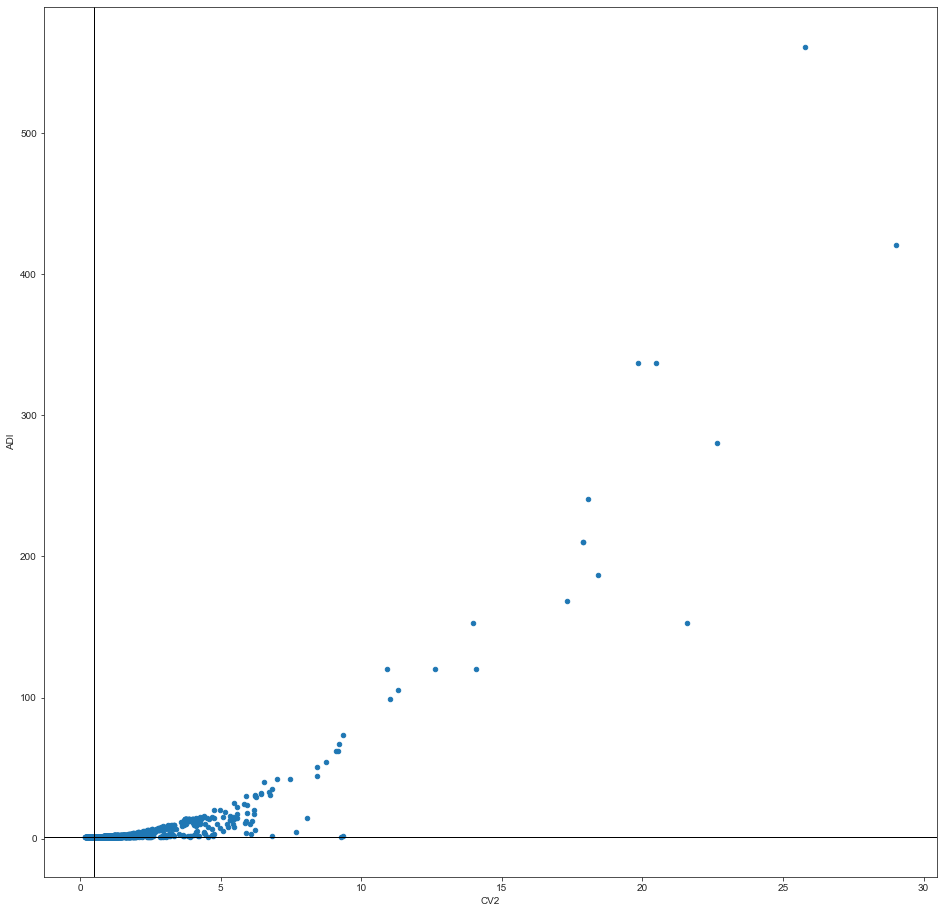

In [221]:
retail_forc.plot.scatter(x='CV2', y='ADI', figsize=(16,16))

cv2_treshold = 0.49
ADI_treshold = 1.32

plt.axhline(y=ADI_treshold,linewidth=1, color='k')
plt.axvline(x=cv2_treshold,linewidth=1, color='k')

In [230]:
retail_forc.fillna(0, inplace=True)
retail_forc.replace([np.inf, -np.inf], 0, inplace=True)

retail_forc

,id_store_family,ADI,CV2
0,1 - AUTOMOTIVE,1.15,0.848799
1,1 - BABY CARE,0.00,0.000000
2,1 - BEAUTY,1.18,0.788420
3,1 - BEVERAGES,1.00,0.457799
4,1 - BOOKS,13.26,4.282451
...,...,...,...
1777,9 - POULTRY,1.00,0.339295
1778,9 - PREPARED FOODS,1.00,0.394847
1779,9 - PRODUCE,1.66,0.908489
1780,9 - SCHOOL AND OFFICE SUPPLIES,1.87,3.683715


In [245]:
conditions = [
    (retail_forc['ADI'] <= 1.32) & (retail_forc['CV2'] <= 0.49),
    (retail_forc['ADI'] > 1.32) & (retail_forc['CV2'] <= 0.49),
    (retail_forc['ADI'] <= 1.32) & (retail_forc['CV2'] > 0.49),
    (retail_forc['ADI'] > 1.32) & (retail_forc['CV2'] > 0.49)]

values = ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']

retail_forc['classification'] = np.select(conditions, values)

In [257]:
retail_forc.groupby('classification').count()['id_store_family']

classification
Erratic    433
Lumpy      864
Smooth     485
Name: id_store_family, dtype: int64

<AxesSubplot:xlabel='classification'>

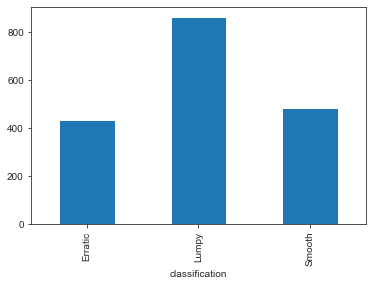

In [252]:
retail_forc.groupby('classification').count()['id_store_family'].plot(kind='bar')